In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_2018 = pd.read_csv('pavement_data_2018.csv')
df_2021 = pd.read_csv('pavement_data_2021.csv')

In [3]:
df = pd.concat([df_2018, df_2021], ignore_index=True)

In [20]:
print(df)

    Section  Rutting (mm)  Fatigue Cracking (m²)  Block Cracking (m²)  \
0         1           4.8                    2.0                  0.0   
1         2           4.4                    1.5                  0.0   
2         3           8.0                    2.5                  0.0   
3         4           9.0                    4.0                  0.0   
4         5           2.2                    0.0                  0.0   
..      ...           ...                    ...                  ...   
69       33           6.1                    2.6                  0.2   
70       34           7.2                    3.0                  0.1   
71       35           5.9                    2.2                  0.0   
72       36           7.4                    3.1                  0.0   
73       37           6.5                    2.7                  0.0   

    Longitudinal Cracking (m²)  Transverse Cracking (m²)  Patching (m²)  \
0                         26.0                  

In [4]:
X = df.drop(columns=['PCI (%)', 'Section' , 'Potholes (number)','Delamination (m²)'])
y = df['PCI (%)']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train

,Rutting (mm),Fatigue Cracking (m²),Block Cracking (m²),Longitudinal Cracking (m²),Transverse Cracking (m²),Patching (m²)
22,7.8,1.6,0.3,22.5,6.9,17.8
57,6.6,3.2,0.0,27.0,3.8,15.7
50,4.6,1.2,0.1,18.0,3.6,14.4
33,4.5,2.2,0.1,24.1,6.2,16.5
39,5.8,2.5,0.0,16.0,8.0,7.0
70,7.2,3.0,0.1,25.0,6.2,16.5
16,7.5,3.4,0.7,27.3,6.7,16.6
35,6.4,1.5,0.0,25.6,4.7,19.1
44,6.9,3.0,0.5,21.0,6.2,14.5
61,6.7,3.0,0.0,21.0,7.5,16.7


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
print(df.isnull().sum())

Section                       0
Rutting (mm)                  0
Fatigue Cracking (m²)         0
Block Cracking (m²)           0
Longitudinal Cracking (m²)    0
Transverse Cracking (m²)      0
Patching (m²)                 0
Potholes (number)             0
Delamination (m²)             0
PCI (%)                       0
dtype: int64


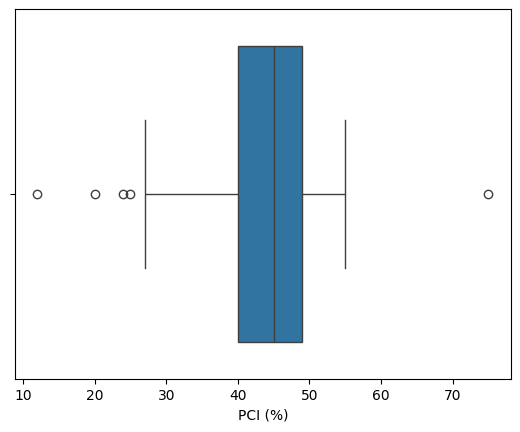

In [9]:
sns.boxplot(x=df['PCI (%)'])
plt.show()

In [10]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top 5 features
selector = SelectKBest(score_func=f_regression, k=6)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Rutting (mm)', 'Fatigue Cracking (m²)', 'Block Cracking (m²)',
       'Longitudinal Cracking (m²)', 'Transverse Cracking (m²)',
       'Patching (m²)'],
      dtype='object')


In [11]:
model = Sequential()
# model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))

# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=1, activation='linear'))  # Linear activation for regression


# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])


d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, callbacks=[early_stop], verbose=1)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 2022.6355 - mean_absolute_error: 44.5379 - val_loss: 1754.1508 - val_mean_absolute_error: 40.0135
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1905.4233 - mean_absolute_error: 43.1414 - val_loss: 1739.1151 - val_mean_absolute_error: 39.8119
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1916.6475 - mean_absolute_error: 43.1573 - val_loss: 1721.1665 - val_mean_absolute_error: 39.5754
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1873.7946 - mean_absolute_error: 42.6570 - val_loss: 1698.2943 - val_mean_absolute_error: 39.2717
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1966.5442 - mean_absolute_error: 43.8810 - val_loss: 1667.8778 - val_mean_absolute_error: 38.8622
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1888.9923 - mean_absolute_error: 43.0324 - val_loss: 1627.3043 - val_mean_absolute_error: 38.3083
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1744.7

In [14]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 120.3499 - mean_absolute_error: 8.1931
Test Mean Absolute Error: 8.193083763122559


In [15]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Root Mean Squared Error (RMSE): 10.970407684196216
R^2 Score: 0.0292279676478433


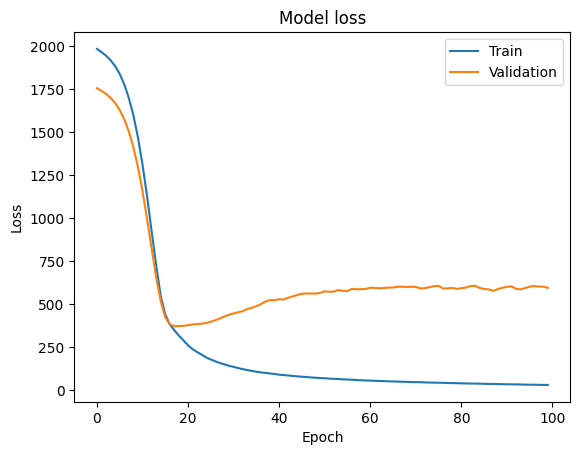

In [16]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

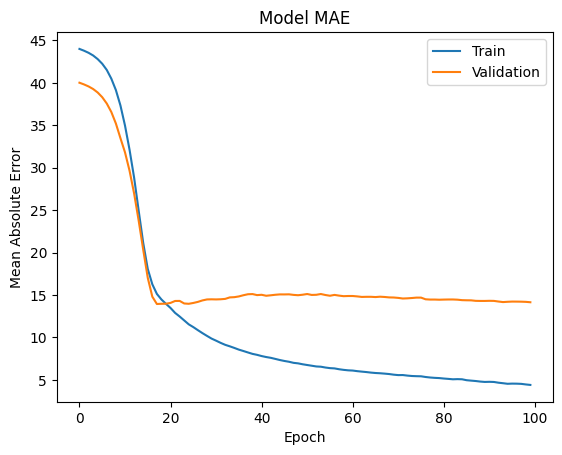

In [17]:
# Plot training & validation MAE values
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model MAE')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [19]:
print(y_test)

4     75.0
63    48.0
18    36.0
0     20.0
28    54.0
73    48.0
10    38.0
34    39.0
12    46.0
55    47.0
65    49.0
31    40.0
9     45.0
45    46.0
5     50.0
Name: PCI (%), dtype: float64


In [22]:
model.save('pavement_model-test-1.keras')